In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# font
import matplotlib as mpl

# win
mpl.rc('font',family='MS Gothic')

In [2]:
#データのインポート

saimesh1 = gpd.read_file('data/SDDSWS5338.zip')
saimesh2 = gpd.read_file('data/SDDSWS5339.zip')
saimesh3 = gpd.read_file('data/SDDSWS5438.zip')
saimesh4 = gpd.read_file('data/SDDSWS5439.zip')

In [3]:
# 統合
saimesh = gpd.pd.concat([saimesh1,saimesh2,saimesh3,saimesh4])

<Axes: >

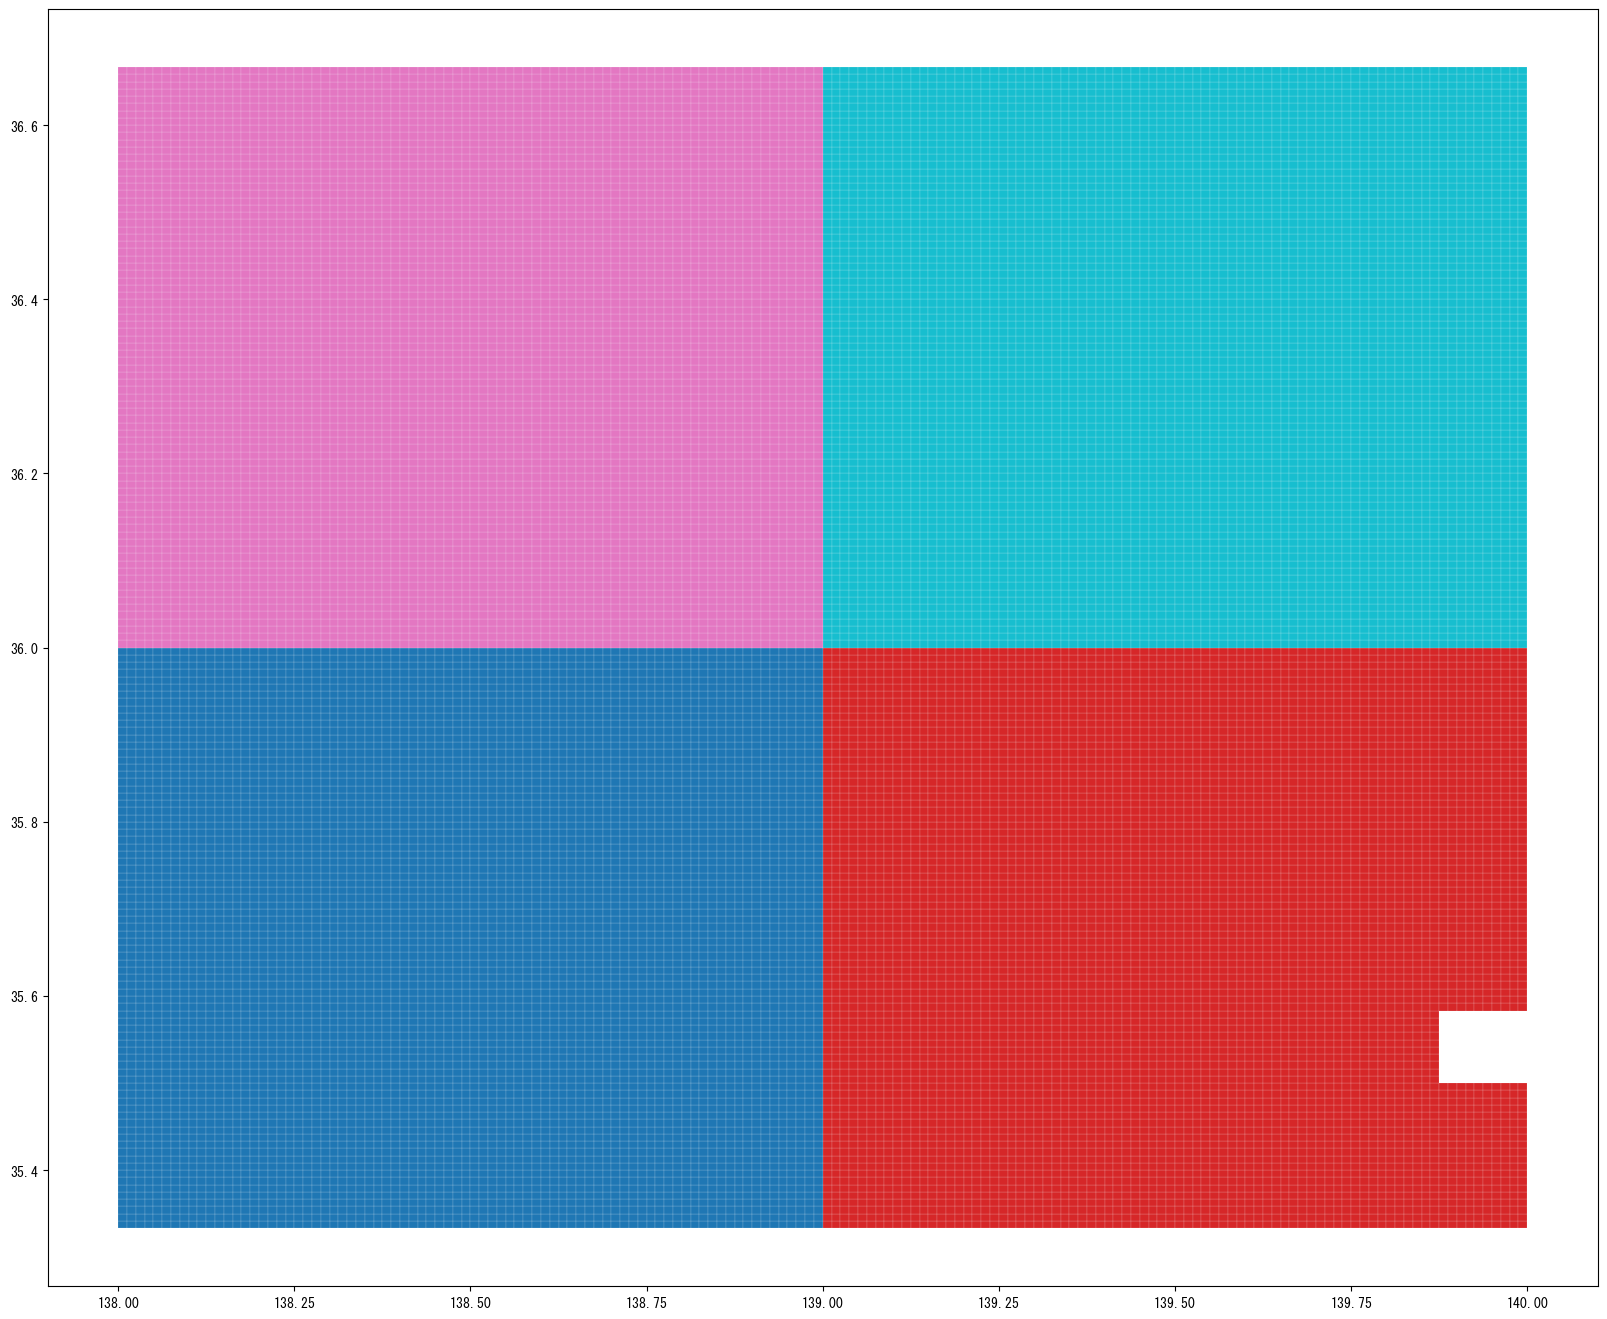

In [4]:
# とりまテスト
saimesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

これは分かりにくい

In [5]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
saidata1 = pd.read_csv('data/tblT001100S5338.zip', encoding='cp932')
saidata2 = pd.read_csv('data/tblT001100S5339.zip', encoding='cp932')
saidata3 = pd.read_csv('data/tblT001100S5438.zip', encoding='cp932')
saidata4 = pd.read_csv('data/tblT001100S5439.zip', encoding='cp932')

In [6]:
saidata4.head(5)

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,54390001.0,0.0,NaN,NaN,13,6,7,2,1,1,...,0,0,5,5,0,0,4,0,0,3
2,54390002.0,0.0,NaN,NaN,275,119,156,21,6,15,...,2,1,72,51,21,6,56,0,11,14
3,54390003.0,0.0,NaN,NaN,110,58,52,8,4,4,...,1,0,33,27,6,2,27,0,8,6
4,54390004.0,0.0,NaN,NaN,56,31,25,1,0,1,...,0,0,17,12,5,0,14,0,3,3


In [7]:
saidata1 = saidata1[1:]
saidata2 = saidata2[1:]
saidata3 = saidata3[1:]
saidata4 = saidata4[1:]

saidata1 = saidata1.replace('*',np.nan)
saidata2 = saidata2.replace('*',np.nan)
saidata3 = saidata3.replace('*',np.nan)
saidata4 = saidata4.replace('*',np.nan)

In [8]:
saidata = pd.concat([saidata1,saidata2,saidata3,saidata4])
saidata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [9]:
# 4番目以降をアウトプット
saidata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [10]:
# objectからfloatに変換
saidata[saidata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,8.0,4.0,4.0,0.0,0.0,0.0,13.0,6.0,7.0,2.0,...,0.0,0.0,5.0,5.0,0.0,0.0,7.0,0.0,3.0,4.0
2,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,36.0,16.0,20.0,3.0,1.0,2.0,31.0,14.0,17.0,20.0,...,0.0,0.0,11.0,11.0,0.0,1.0,7.0,0.0,2.0,3.0
5376,1640.0,859.0,781.0,396.0,209.0,187.0,1230.0,639.0,591.0,1019.0,...,12.0,2.0,452.0,418.0,34.0,146.0,134.0,37.0,22.0,38.0
5377,869.0,447.0,422.0,227.0,114.0,113.0,639.0,331.0,308.0,489.0,...,13.0,2.0,231.0,195.0,36.0,74.0,94.0,6.0,11.0,26.0
5378,146.0,77.0,69.0,22.0,14.0,8.0,124.0,63.0,61.0,78.0,...,4.0,3.0,37.0,21.0,16.0,4.0,31.0,0.0,5.0,5.0


In [11]:
# データの入れ替え
saidata[saidata.columns[4:]]=saidata[saidata.columns[4:]].astype(float)
# チェック
saidata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15362 entries, 1 to 5379
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    15362 non-null  float64
 1   HTKSYORI    15362 non-null  float64
 2   HTKSAKI     1187 non-null   float64
 3   GASSAN      948 non-null    object 
 4   T001100001  15362 non-null  float64
 5   T001100002  15362 non-null  float64
 6   T001100003  15362 non-null  float64
 7   T001100004  14175 non-null  float64
 8   T001100005  14175 non-null  float64
 9   T001100006  14175 non-null  float64
 10  T001100007  14175 non-null  float64
 11  T001100008  14175 non-null  float64
 12  T001100009  14175 non-null  float64
 13  T001100010  14175 non-null  float64
 14  T001100011  14175 non-null  float64
 15  T001100012  14175 non-null  float64
 16  T001100013  14175 non-null  float64
 17  T001100014  14175 non-null  float64
 18  T001100015  14175 non-null  float64
 19  T001100016  14175 non-null  flo

In [12]:
# KEY_CODEをfloatに
saimesh['KEY_CODE']=saimesh['KEY_CODE'].astype(float)

In [13]:
# merge the data
saimesh = saimesh.merge(saidata, on='KEY_CODE')

In [14]:
# check!
saimesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
709,53383307.0,5338,33,07,2708,"POLYGON ((138.47500 35.58333, 138.46250 35.583...",0.0,NaN,NaN,2015.0,...,13.0,6.0,554.0,481.0,73.0,61.0,400.0,16.0,105.0,112.0
1750,53386354.0,5338,63,54,5155,"POLYGON ((138.43750 35.87500, 138.42500 35.875...",0.0,NaN,NaN,28.0,...,0.0,0.0,9.0,9.0,0.0,0.0,12.0,0.0,4.0,4.0
13250,54394174.0,5439,41,74,3375,"POLYGON ((139.18750 36.39167, 139.17500 36.391...",0.0,NaN,NaN,232.0,...,3.0,3.0,55.0,43.0,12.0,9.0,49.0,0.0,8.0,16.0
2546,53390742.0,5339,07,42,743,"POLYGON ((139.91250 35.36667, 139.90000 35.366...",0.0,NaN,NaN,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,10.0,0.0
764,53383389.0,5338,33,89,2790,"POLYGON ((138.50000 35.65000, 138.48750 35.650...",0.0,NaN,NaN,967.0,...,9.0,1.0,232.0,203.0,29.0,24.0,143.0,3.0,37.0,52.0


In [15]:
# reproject to 3857 (web mercator)
saimesh = saimesh.to_crs(3857)

<Axes: >

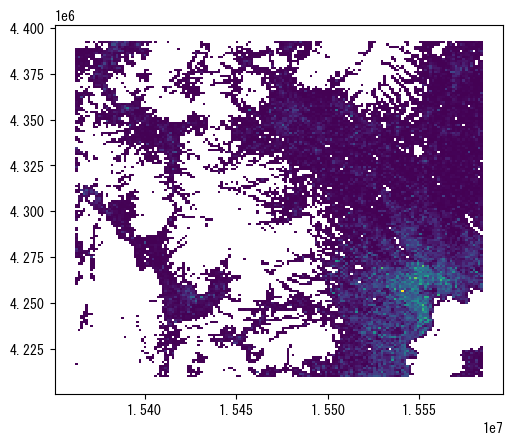

In [16]:
# チェック
saimesh.plot(column='T001100030')

なんかわかりにくい

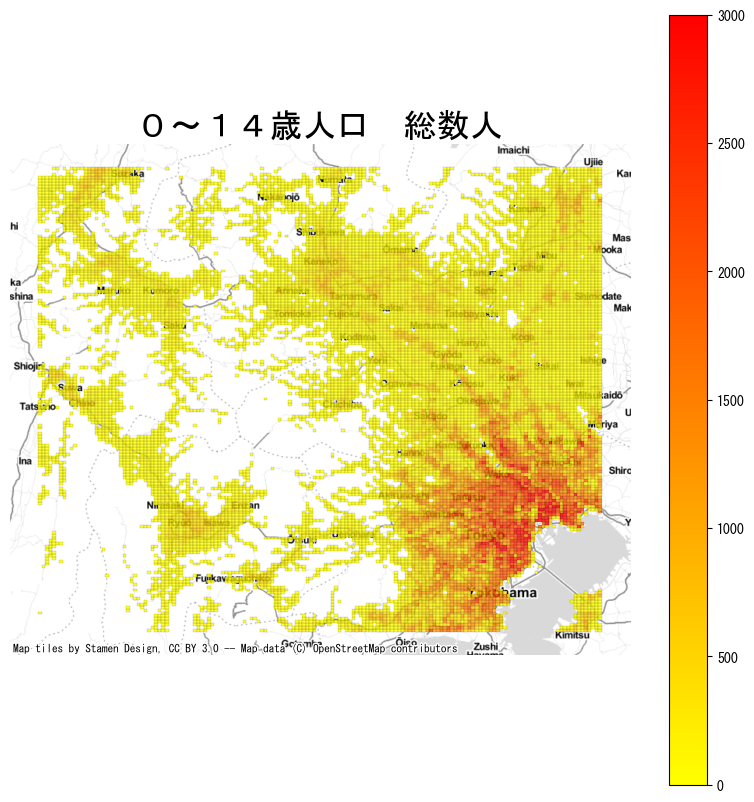

In [19]:
# 人口 map 0~14歳
ax = saimesh.plot(figsize=(10,10),
         column='T001100004',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmax=3000)

# hide axes
ax.axis('off')

# タイトル
ax.set_title('０～１４歳人口　総数人',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

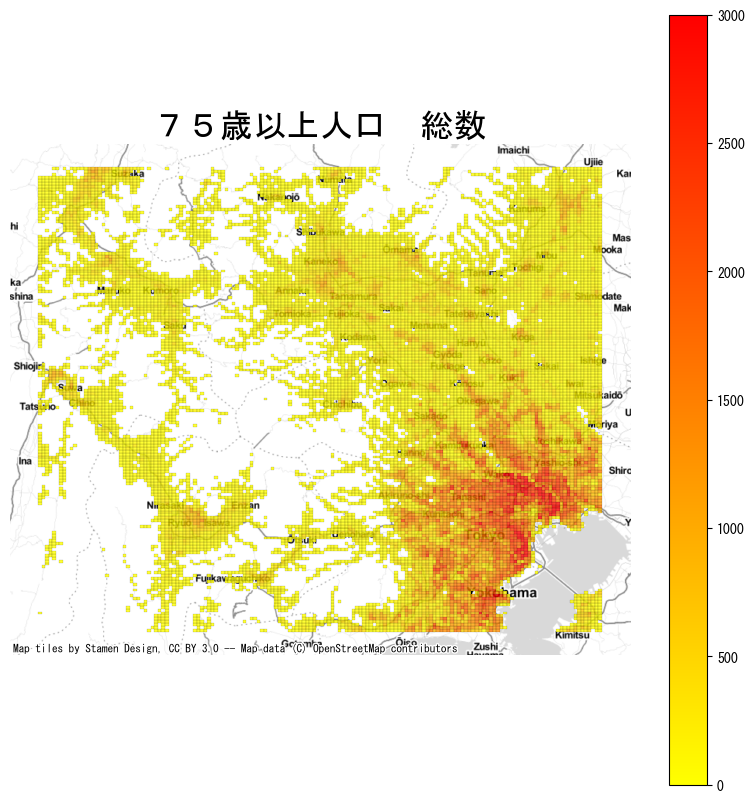

In [22]:
# 人口 map 75歳以上
ax = saimesh.plot(figsize=(10,10),
         column='T001100022',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmax=3000)

# hide axes
ax.axis('off')

# タイトル
ax.set_title('７５歳以上人口　総数',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)